## 檢視資料

In [1]:
import pandas_datareader.data as web
from IPython.display import display
import datetime 

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2017, 5, 1)

df = web.DataReader("F", 'google', start, end)
display(df[:10])

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,12.20,12.60,12.13,12.59,40510821
2017-01-04,12.77,13.27,12.74,13.17,77638075
2017-01-05,13.21,13.22,12.63,12.77,75628443
2017-01-06,12.80,12.84,12.64,12.76,40315887
2017-01-09,12.79,12.86,12.63,12.63,39438393
2017-01-10,12.70,13.02,12.66,12.85,58703537
2017-01-11,12.71,12.72,12.51,12.67,49718725
2017-01-12,12.66,12.68,12.35,12.59,36493266
2017-01-13,12.62,12.67,12.50,12.63,29197105


In [2]:
display(df.describe())

,Open,High,Low,Close,Volume
count,82.000000,82.000000,82.000000,82.000000,8.200000e+01
mean,12.178293,12.257073,12.061463,12.158049,3.939365e+07
std,0.557237,0.565328,0.545061,0.564590,1.440477e+07
min,11.150000,11.180000,11.080000,11.110000,2.252060e+07
25%,11.587500,11.685000,11.457500,11.605000,2.906381e+07
50%,12.450000,12.520000,12.340000,12.420000,3.582913e+07
75%,12.617500,12.667500,12.495000,12.590000,4.464800e+07
max,13.210000,13.270000,12.740000,13.170000,1.015599e+08


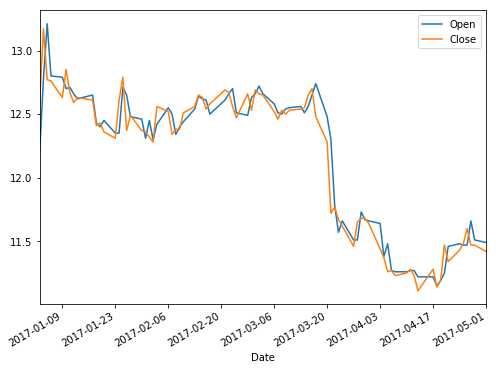

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
df[['Open', 'Close']].plot(figsize=(8, 6))

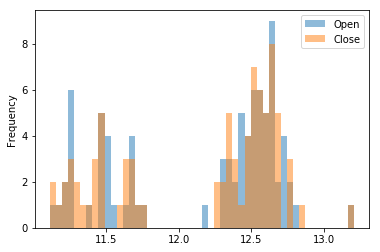

In [4]:
df[['Open', 'Close']].plot.hist(bins=50, alpha=0.5)

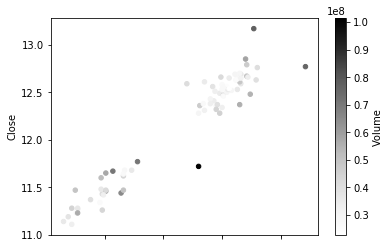

In [5]:
df.plot.scatter(x='Open', y='Close', c='Volume')

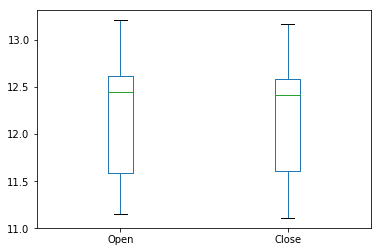

In [6]:
df[['Open', 'Close']].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62611d7690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f62609d7a10>]], dtype=object)

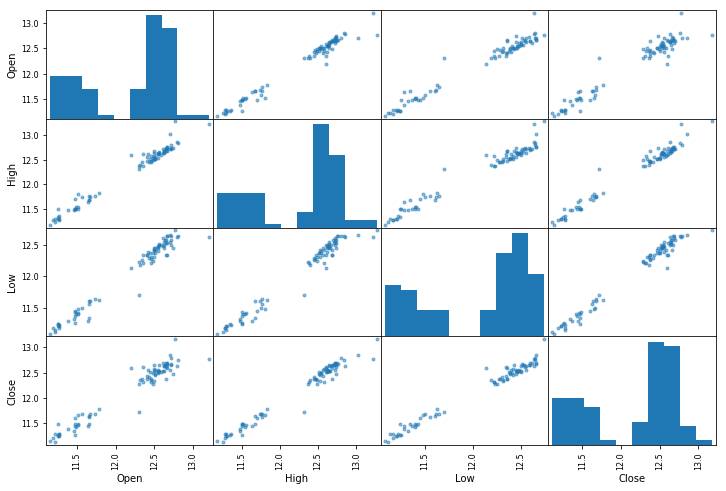

In [7]:
from pandas.tools import plotting
plotting.scatter_matrix(df[['Open', 'High', 'Low', 'Close']], figsize=(12,8))

## 基本的假設檢定

In [8]:
from scipy import stats
# More details : https://docs.scipy.org/doc/scipy/reference/stats.html

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2017, 1, 31)
df1 = web.DataReader("F", 'google', start, end)

start = datetime.datetime(2017, 2, 1)
end = datetime.datetime(2017, 2, 28)
df2 = web.DataReader("F", 'google', start, end)

start = datetime.datetime(2017, 3, 1)
end = datetime.datetime(2017, 3, 31)
df3 = web.DataReader("F", 'google', start, end)

start = datetime.datetime(2017, 4, 1)
end = datetime.datetime(2017, 4, 30)
df4 = web.DataReader("F", 'google', start, end)

In [9]:
# One-sample t-test
# 檢定母體平均數是否大於、小於或等於某一特定數值。
result = stats.ttest_1samp(df1['Close'], 12.5)
print result.pvalue
result = stats.ttest_1samp(df1['Close'], 30)
print result.pvalue
result = stats.ttest_1samp(df1['Close'], 2)
print result.pvalue

0.0791366135808
5.25564240058e-38
6.66353084631e-34


In [16]:
# two-sample t-test
# 檢定兩組樣本間母體平均數的差異是否大於、小於或等於某一特定數值。
# If we observe a large p-value, for example larger than 0.05 or 0.1, 
# then we cannot reject the null hypothesis of identical average scores. 
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, 
# then we reject the null hypothesis of equal averages.
result = stats.ttest_ind(df1['Close'], df2['Close'])
print result.pvalue
result = stats.ttest_ind(df1['Close'], df3['Close'])
print result.pvalue
result = stats.ttest_ind(df1['Close'], df4['Close'])
print result.pvalue

1.0
0.214827310291
0.00129363464234
8.88303351339e-23


In [15]:
# paired-sample t-test
result = stats.ttest_rel(df1['Close'], df1['High'])
print result.pvalue
result = stats.ttest_rel(df1['Close'], df1['Low'])
print result.pvalue
result = stats.ttest_rel(df1['Close'], df1['Open'])
print result.pvalue

nan
0.000293243135142
1.38436278633e-05
0.937505803562


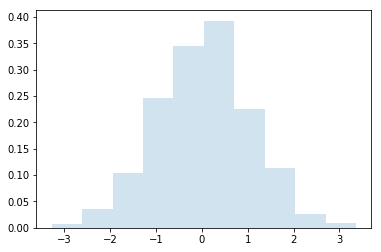

0.855572193567


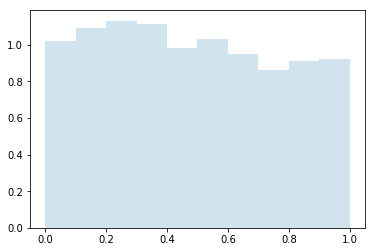

5.94920260178e-129


In [23]:
x = stats.norm.rvs(size=1000)
result = stats.normaltest(x)
plt.hist(x, normed=True, histtype='stepfilled', alpha=0.2)
plt.show()
print result.pvalue

x = stats.uniform.rvs(size=1000)
result = stats.normaltest(x)
plt.hist(x, normed=True, histtype='stepfilled', alpha=0.2)
plt.show()
print result.pvalue